# Курсовая работа по дисциплине «Технологии Машинного Обучения» 

## Задание

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
7. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
8. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
9. Повторение пункта 7 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
10. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется постройение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д. 

In [287]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE, median_absolute_error as MedAE, r2_score as R2
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [179]:
data = pd.read_csv("Train.csv",sep=",")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
print(data.shape)

(1460, 81)


#### Список стобцов

In [181]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Типы данных

In [182]:
data_types={'float64':0, 'object':0, 'int64':0}
for i in data.dtypes:
    data_types[str(i)]+=1

###### Посмотрим сколько каких типов данных в датасете

In [183]:
for typ, count in data_types.items():
    print(typ, count)

float64 3
object 43
int64 35


#### Проверим наличие пропущенных значений и их количество

In [184]:
for col in data.columns:
  null_count = data[data[col].isnull()].shape[0]
  print('{} - {}'.format(col, null_count))

Id - 0
MSSubClass - 0
MSZoning - 0
LotFrontage - 259
LotArea - 0
Street - 0
Alley - 1369
LotShape - 0
LandContour - 0
Utilities - 0
LotConfig - 0
LandSlope - 0
Neighborhood - 0
Condition1 - 0
Condition2 - 0
BldgType - 0
HouseStyle - 0
OverallQual - 0
OverallCond - 0
YearBuilt - 0
YearRemodAdd - 0
RoofStyle - 0
RoofMatl - 0
Exterior1st - 0
Exterior2nd - 0
MasVnrType - 8
MasVnrArea - 8
ExterQual - 0
ExterCond - 0
Foundation - 0
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinSF1 - 0
BsmtFinType2 - 38
BsmtFinSF2 - 0
BsmtUnfSF - 0
TotalBsmtSF - 0
Heating - 0
HeatingQC - 0
CentralAir - 0
Electrical - 1
1stFlrSF - 0
2ndFlrSF - 0
LowQualFinSF - 0
GrLivArea - 0
BsmtFullBath - 0
BsmtHalfBath - 0
FullBath - 0
HalfBath - 0
BedroomAbvGr - 0
KitchenAbvGr - 0
KitchenQual - 0
TotRmsAbvGrd - 0
Functional - 0
Fireplaces - 0
FireplaceQu - 690
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageCars - 0
GarageArea - 0
GarageQual - 81
GarageCond - 81
PavedDrive - 0
WoodDeckSF -

In [185]:
nd = data.columns[data.isnull().any()]
catsnnd = [col for col in nd if data[col].dtype=="object"]
print(catsnnd)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [187]:
catsnnd.remove('MiscFeature')
catsnnd.remove('Fence')
catsnnd.remove('PoolQC')

In [188]:
for column in catsnnd:
    temp_data = data[[column]]
    imp = SimpleImputer(strategy='most_frequent')
    data_num_imp = imp.fit_transform(temp_data)
    data[[column]] = data_num_imp

In [189]:
nd = data.columns[data.isnull().any()]
intnd = [col for col in nd if data[col].dtype!="object"]
print(intnd)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [190]:
for column in intnd:
    temp_data = data[[column]]
    imp = SimpleImputer(strategy='median')
    data_num_imp = imp.fit_transform(temp_data)
    data[[column]] = data_num_imp

In [192]:
data=data.dropna(axis=1, how='any')

In [193]:
nd = data.columns[data.isnull().any()]
print(len(nd))

0


In [194]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Закодируем категориальные признаки

In [195]:
cats = [col for col in data.columns if data[col].dtype=="object"]
le = LabelEncoder()
for col in cats:
    data[col]=le.fit_transform(data[col])
cats = [col for col in data.columns if data[col].dtype=="object"]
print(len(cats))

0


#### Построим матрицу корреляции

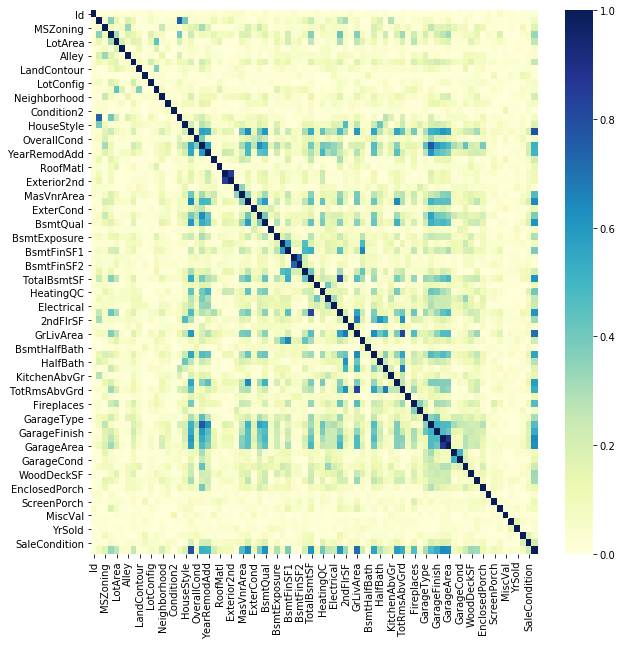

In [294]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr().abs(),cmap='YlGnBu', annot=False, fmt='.3f', ax=ax)

Посмотрим значения матрицы корреляции 


In [198]:
data.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.009921,-0.033226,0.008916,-0.001658,0.032122,-0.019659,0.013324,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.356718,-0.139781,-0.024969,0.184539,0.119289,-0.002940,-0.022844,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.105961,-0.034452,0.087654,-0.329278,0.061887,-0.017854,-0.001192,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.009921,-0.356718,-0.105961,1.000000,0.304522,-0.037349,-0.170656,-0.138877,-0.076080,-0.001027,...,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,-0.031412,0.058857,0.334771
LotArea,-0.033226,-0.139781,-0.034452,0.304522,1.000000,-0.197131,-0.077747,-0.165315,-0.149083,0.010123,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.037349,-0.197131,1.000000,0.010919,-0.010224,0.115995,0.001682,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
Alley,-0.001658,0.184539,-0.329278,-0.170656,-0.077747,0.010919,1.000000,0.054032,-0.046142,-0.004450,...,0.081758,-0.019775,-0.014839,-0.011676,-0.014905,-0.021780,-0.001392,-0.005434,-0.028603,-0.027655
LotShape,0.032122,0.119289,0.061887,-0.138877,-0.165315,-0.010224,0.054032,1.000000,0.085434,-0.036101,...,0.078213,-0.036459,-0.053054,-0.020051,-0.042061,-0.033455,0.036449,-0.000911,-0.038118,-0.255580
LandContour,-0.019659,-0.002940,-0.017854,-0.076080,-0.149083,0.115995,-0.046142,0.085434,1.000000,0.008238,...,-0.058742,-0.021404,0.003836,-0.013098,0.020912,-0.011599,0.020507,-0.025754,0.033809,0.015453
Utilities,0.013324,-0.022844,-0.001192,-0.001027,0.010123,0.001682,-0.004450,-0.036101,0.008238,1.000000,...,-0.009407,-0.003046,0.102365,-0.001798,-0.002296,-0.051552,0.023353,-0.126770,-0.089701,-0.014314


In [199]:
data.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
GarageArea      0.623431
BsmtQual        0.618025
TotalBsmtSF     0.613581
1stFlrSF        0.605852
KitchenQual     0.589189
FullBath        0.560664
GarageFinish    0.537242
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
HeatingQC       0.400178
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
GarageType      0.302105
BsmtExposure    0.295407
HalfBath        0.284108
LotArea         0.263843
LotShape        0.255580
                  ...   
Exterior2nd     0.103766
Exterior1st     0.103551
Heating         0.098812
GarageQual      0.098759
PoolArea        0.092404
BsmtFinType1    0.092106
Condition1      0.091155
BldgType        0.085591
MSSubClass      0.084284


In [296]:
good_corr = []
for k, v in (dict(data.corr()['SalePrice'].abs())).items():
    if v >=0.5:
        good_corr.append(k)
        
print(good_corr)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice']


In [297]:
good_corr_data = data[good_corr]
print(good_corr_data.columns)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


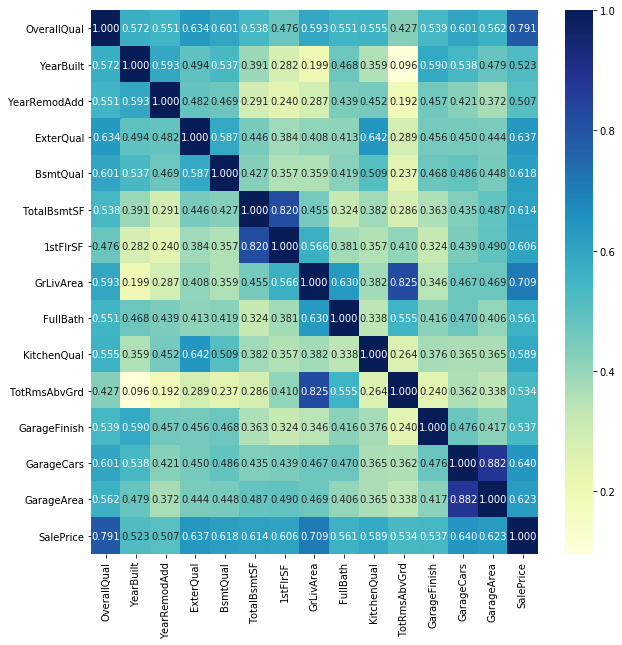

In [298]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(good_corr_data.corr().abs(), cmap='YlGnBu', annot=True, fmt='.3f', ax=ax)

Признаки TotRmsAbvGrd, GarageArea, 1stFlrSF сильно коррелируют c другими признаками, которые не являются целевыми, стоит убрать из выборки

In [299]:
good_corr.remove('TotRmsAbvGrd')
good_corr.remove('GarageArea')
good_corr.remove('1stFlrSF')

In [300]:
good_corr_data = data[good_corr]
print(good_corr_data.columns)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish',
       'GarageCars', 'SalePrice'],
      dtype='object')


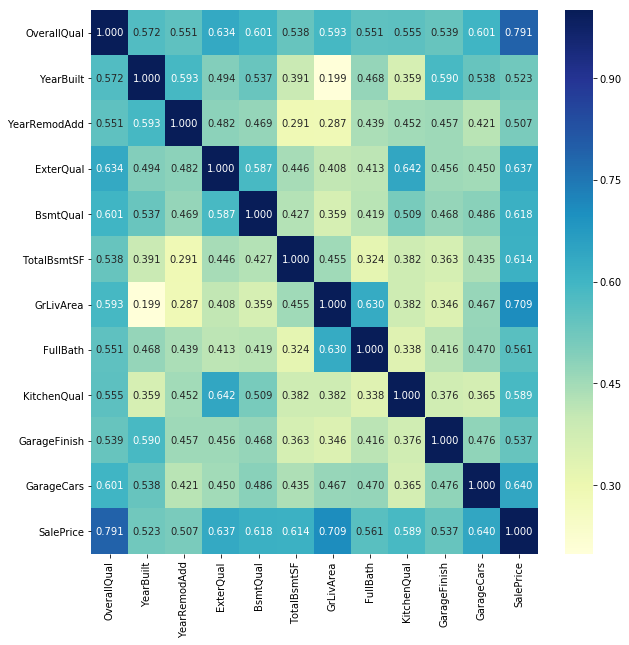

In [301]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(good_corr_data.corr().abs(), cmap='YlGnBu', annot=True, fmt='.3f', ax=ax)

Построим построим парные диаграммы для всего датасета

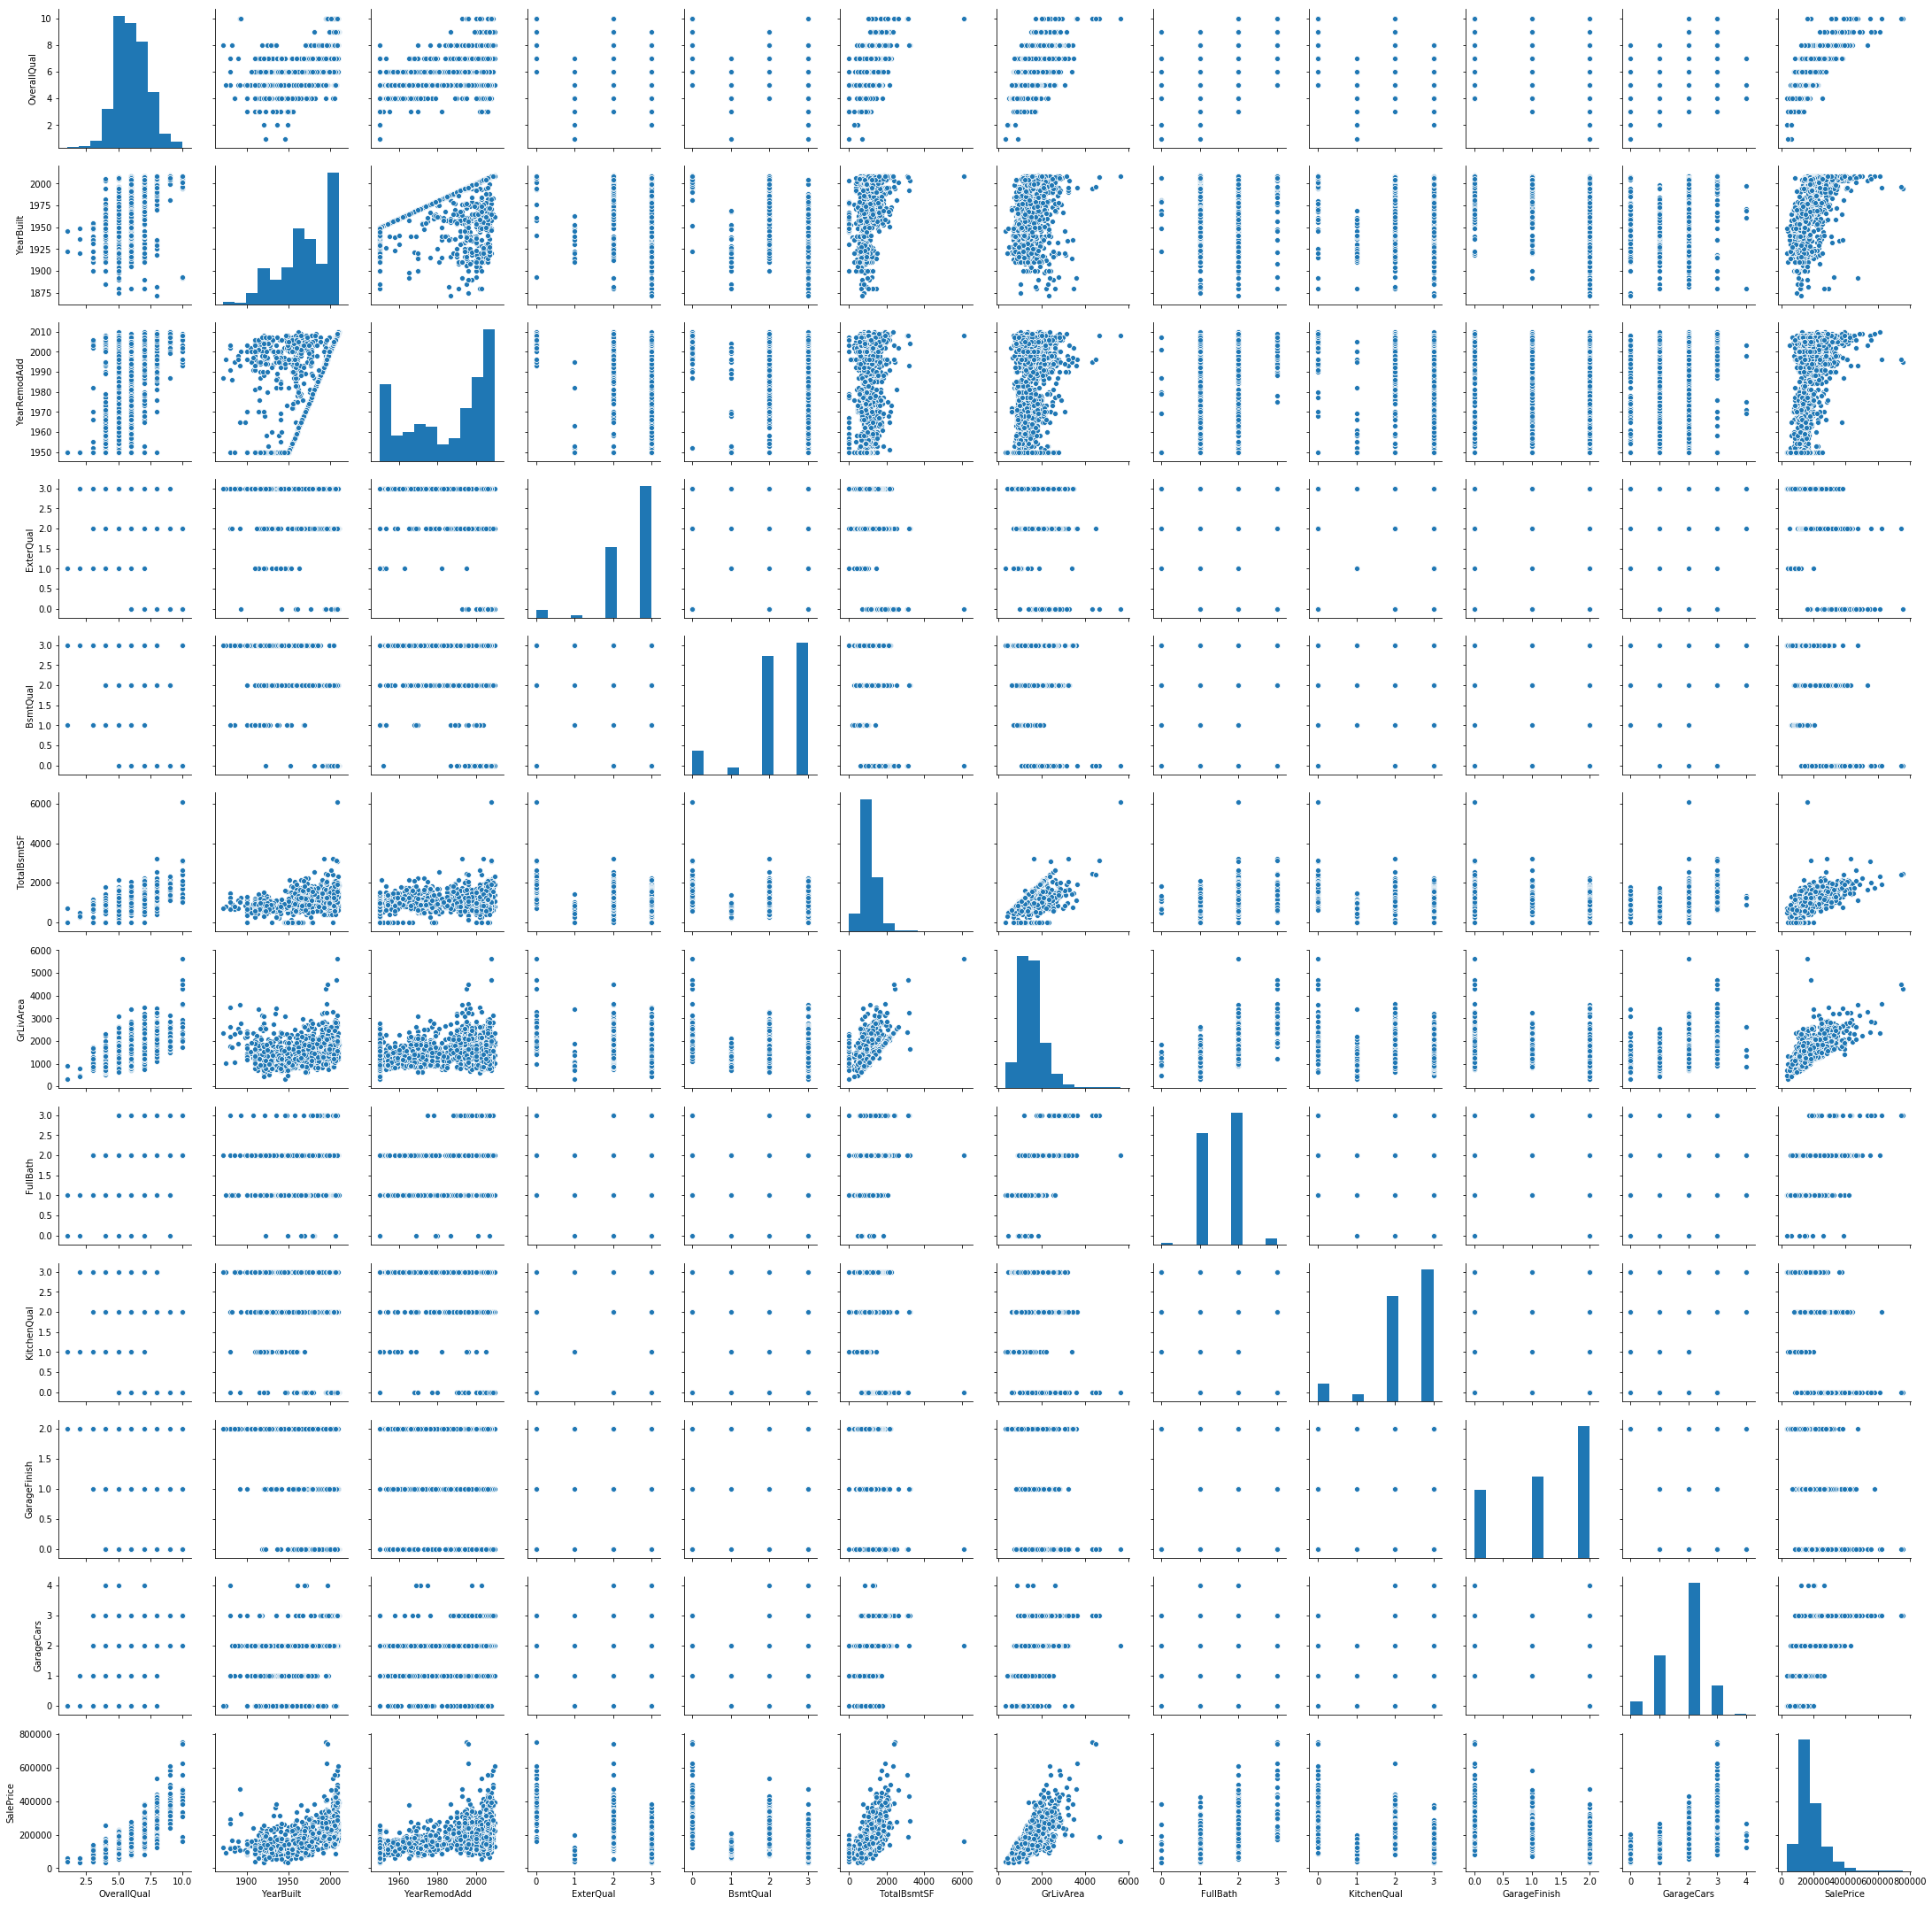

In [211]:
sns.pairplot(good_corr_data)

### Выбраны метрики:
* 1 - R2 метрика - самый лучший выбор в задачи регрессии
* 2 - MAE - средняя абсолютная ошибка, преимущество его в том оно не сильно штрафует за выбросы в данных
* 3 - MedAE - среднее медианное отклонение, показывает отклонение от средней величины


### Выбраны модели:
* 1 - RandomForest - ансамблевая модель Случайный лес - один из немногих универсальных алгоритмов
* 2 - Desicion Tree - дерево решений, простая и наглядная модель.
* 3 - SVM - наиболее быстрый метод нахождения решающих функций
* 4 - GradientBoosting - градиентный бустинг, на сегодняшний день является одним из самых мощных алгоритмов распознавания.
* 5 - ElasticNet - простая линейная модель, с регуляризацией

### Разделим выборку на обучающую и тестовую

In [219]:
y=data["SalePrice"]

In [220]:
x= x=data.drop("SalePrice",axis=1)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Обучим модели и проверим их метриками качества

### RandomForest

In [237]:
RF=RandomForestRegressor().fit(X_train, y_train)

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [238]:
res_RF = RF.predict(X_test)
print(MAE(y_test,res_RF))
print(MedAE(y_test,res_RF))
print(R2(y_test,res_RF))

18587.838356164386
12286.299999999988
0.8934839971343332


### Desicion Tree

In [239]:
DT=DecisionTreeRegressor().fit(X_train, y_train)

In [240]:
res_DT = DT.predict(X_test)
print(MAE(y_test,res_DT))
print(MedAE(y_test,res_DT))
print(R2(y_test,res_DT))

27939.921232876713
17068.0
0.7659685028584341


### SVM

In [241]:
reg=SVR().fit(X_train, y_train)

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [242]:
res_svm = reg.predict(X_test)
print(MAE(y_test,res_svm))
print(MedAE(y_test,res_svm))
print(R2(y_test,res_svm))

59568.202511415526
40000.43333333332
-0.0249731726987783


### GradientBoosting

In [243]:
GB=GradientBoostingRegressor(
    n_estimators=10,
    max_depth=10,
    learning_rate=0.01).fit(X_train, y_train)

In [244]:
res_GB = GB.predict(X_test)
print(MAE(y_test,res_GB))
print(MedAE(y_test,res_GB))
print(R2(y_test,res_GB))

57224.84342146683
44483.88575610731
0.1529978466864158


### ElasticNet

In [245]:
EN=ElasticNet().fit(X_train, y_train)

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [246]:
res_EN = EN.predict(X_test)
print(MAE(y_test,res_EN))
print(MedAE(y_test,res_EN))
print(R2(y_test,res_EN))

20194.390884847497
12222.416664172197
0.8467463664681263


## Подберем гиперпараметры

### RandomForest

In [261]:
# param = {'n_estimators':range(50,1000,50),'max_depth':[1, 3, 5, 7, 10],'random_state':[0, 2, 4, 6, 8, 10]}
param = {'n_estimators':range(50,200,10)}
new_RF = GridSearchCV(RandomForestRegressor(), param, cv=5,scoring='r2')
new_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(50, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [262]:
new_RF.best_params_

{'n_estimators': 80}

In [265]:
new_RF_reg=RandomForestRegressor(n_estimators=80).fit(X_train,y_train)

In [266]:
new_res_RF = new_RF_reg.predict(X_test)
print(f'По умолчанию: {MAE(y_test,res_RF)}, с гиперпараметром: {MAE(y_test,new_res_RF)}')
print(f'По умолчанию: {MedAE(y_test,res_RF)}, с гиперпараметром: {MedAE(y_test,new_res_RF)}')
print(f'По умолчанию: {R2(y_test,res_RF)}, с гиперпараметром: {R2(y_test,new_res_RF)}')

По умолчанию: 18587.838356164386, с гиперпараметром: 17787.38056506849
По умолчанию: 12286.299999999988, с гиперпараметром: 10616.506250000006
По умолчанию: 0.8934839971343332, с гиперпараметром: 0.8961845839878957


### DecisionTree

In [267]:
param = {'min_impurity_decrease':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
new_DT = GridSearchCV(DecisionTreeRegressor(), param, cv=5,scoring='r2')
new_DT.fit(X_train, y_train)

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_impurity_decrease': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [268]:
new_DT.best_params_

{'min_impurity_decrease': 0.1}

In [269]:
new_DT_reg = DecisionTreeRegressor(min_impurity_decrease= 0.1).fit(X_train, y_train)

In [270]:
new_res_DT = new_DT_reg.predict(X_test)
print(f'По умолчанию: {MAE(y_test,res_DT)}, с гиперпараметром: {MAE(y_test,new_res_DT)}')
print(f'По умолчанию: {MedAE(y_test,res_DT)}, с гиперпараметром: {MedAE(y_test,new_res_DT)}')
print(f'По умолчанию: {R2(y_test,res_DT)}, с гиперпараметром: {R2(y_test,new_res_DT)}')

По умолчанию: 27939.921232876713, с гиперпараметром: 26384.325342465752
По умолчанию: 17068.0, с гиперпараметром: 15500.0
По умолчанию: 0.7659685028584341, с гиперпараметром: 0.7770317689158205


### SVR

In [276]:
param = {'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000]}
new_SVR = GridSearchCV(SVR(), param, cv=5,scoring='r2')
new_SVR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [277]:
new_SVR.best_params_

{'C': 1000, 'gamma': 0.9}

In [278]:
new_SVR_reg = SVR(gamma = 0.9, C= 1000).fit(X_train, y_train)

In [279]:
new_res_SVR = new_SVR_reg.predict(X_test)
print(f'По умолчанию: {MAE(y_test,res_svm)}, с гиперпараметром: {MAE(y_test,new_res_SVR)}')
print(f'По умолчанию: {MedAE(y_test,res_svm)}, с гиперпараметром: {MedAE(y_test,new_res_SVR)}')
print(f'По умолчанию: {R2(y_test,res_svm)}, с гиперпараметром: {R2(y_test,new_res_SVR)}')

По умолчанию: 59568.202511415526, с гиперпараметром: 59560.74095890412
По умолчанию: 40000.43333333332, с гиперпараметром: 40050.0
По умолчанию: -0.0249731726987783, с гиперпараметром: -0.025219486615010167


In [280]:
param = {'n_estimators':[1, 3, 5, 7, 10], 'max_depth':[1, 3, 5, 7, 10], 
         'learning_rate':[0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]}
new_GB = GridSearchCV(GradientBoostingRegressor(), param, cv=5,scoring='r2')
new_GB.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'learning_rate': [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [282]:
new_GB.best_params_

{'learning_rate': 0.025, 'max_depth': 10, 'n_estimators': 10}

In [284]:
new_GB_reg=GradientBoostingRegressor(
    learning_rate = 0.025, 
    max_depth = 10, 
    n_estimators = 10).fit(X_train, y_train)

In [285]:
new_res_GB = new_GB_reg.predict(X_test)
print(f'По умолчанию: {MAE(y_test,res_GB)}, с гиперпараметром: {MAE(y_test,new_res_GB)}')
print(f'По умолчанию: {MedAE(y_test,res_GB)}, с гиперпараметром: {MedAE(y_test,new_res_GB)}')
print(f'По умолчанию: {R2(y_test,res_GB)}, с гиперпараметром: {R2(y_test,new_res_GB)}')

По умолчанию: 57224.84342146683, с гиперпараметром: 50099.35506393144
По умолчанию: 44483.88575610731, с гиперпараметром: 39600.43904238139
По умолчанию: 0.1529978466864158, с гиперпараметром: 0.3358876358716616


In [288]:
param = {"max_iter": [1, 5, 10],
         "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         "l1_ratio": np.arange(0.0, 1.0, 0.1)}
new_EN = GridSearchCV(ElasticNet(), param, cv=10,scoring='r2')
new_EN.fit(X_train, y_train)

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/line

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [1, 5, 10], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [289]:
new_EN.best_params_

{'alpha': 1, 'l1_ratio': 0.8, 'max_iter': 10}

In [292]:
new_EN_reg=ElasticNet(alpha = 1,
                      l1_ratio = 0.8,
                      max_iter = 10).fit(X_train, y_train)

/Users/lina/Documents/ML-Technology/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [293]:
new_res_EN = new_EN_reg.predict(X_test)
print(f'По умолчанию: {MAE(y_test,res_EN)}, с гиперпараметром: {MAE(y_test,new_res_EN)}')
print(f'По умолчанию: {MedAE(y_test,res_EN)}, с гиперпараметром: {MedAE(y_test,new_res_EN)}')
print(f'По умолчанию: {R2(y_test,res_EN)}, с гиперпараметром: {R2(y_test,new_res_EN)}')

По умолчанию: 20194.390884847497, с гиперпараметром: 20576.613824233984
По умолчанию: 12222.416664172197, с гиперпараметром: 13448.601327728713
По умолчанию: 0.8467463664681263, с гиперпараметром: 0.8535237360191417


## Подведем итог

В результате выполнения курсовой работы я обобщила знания полученные на лекциях и при выполнении лабораторных работ. Я научилась работать с ансамблевыми моделями и подбирать для них гиперпараметры. Личный вывод: ансамблевые модели во многом превоскодят обычные. При этом для каждой задачи лучше подойдет определенный метод и определенная метрика.